## **PRACTICAL SESSION 1** — Deep Learning for predictive maintenance

The dataset used is the **AI4I 2020** Predictive Maintenance Dataset, which contains 10,000 instances of industrial sensor data. Each instance represents the operating condition of a machine and is associated with a label indicating whether a failure has occurred and, if so, what type of failure it is.

The 5 possible labels are:



*   **TWF**: Tool Wear Failure
*   **HDF**: Heat Dissipation Failure
*   **PWF**: Power Failure
*   **OSF**: Overstrain Failure
*   **RNF**: Random Failure


The data is available on eCAMPUS as CSV file called: "ai4i2020.csv"



## **PRACTICAL SESSION Goal** — Ceate a deep leanring model allowing to realize a predictive maintenance mission

## **1 - Analysis of the dataset**



All libraries used ***SHOULD BE PLACED*** in the code cell below

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**QUESTION:** Load dataset and display some lines of the csv file.

In [3]:
df = pd.read_csv('ai4i2020.csv')

print(df.head())

   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

**QUESTION:** Display the distribution of machine failures and non-failures with a bar graph.

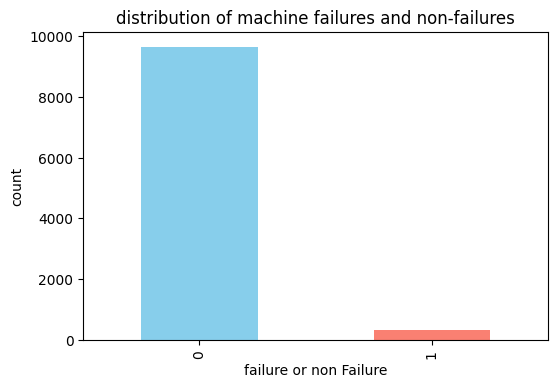

In [4]:
failure_counts = df['Machine failure'].value_counts()

plt.figure(figsize=(6, 4))
failure_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('distribution of machine failures and non-failures')
plt.xlabel('failure or non Failure')
plt.ylabel('count')
plt.show()

**ANALYSIS QUESTION:** What do you observe?

We have a class imbalance issue, as we have 10,000 machines that are functioning correctly and fewer than 500 machines that are not functioning.

**ANALYSIS QUESTION:** What will be the consequence of this phenomenon on the model's learning?

We are going to have a bias toward the majority class. This may lead to a model that is very good at predicting functioning machines but poorly at identifying failures.

**QUESTION:** Create a bar chart showing the distribution of different failure types (TWF, HDF, PWF, OSF, RNF). Display the exact values above each bar in the chart."

/var/folders/1t/5696w2xn2vsdwdq75jywx2sc0000gq/T/ipykernel_32619/2064144671.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, failure_counts[i] + 10, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)


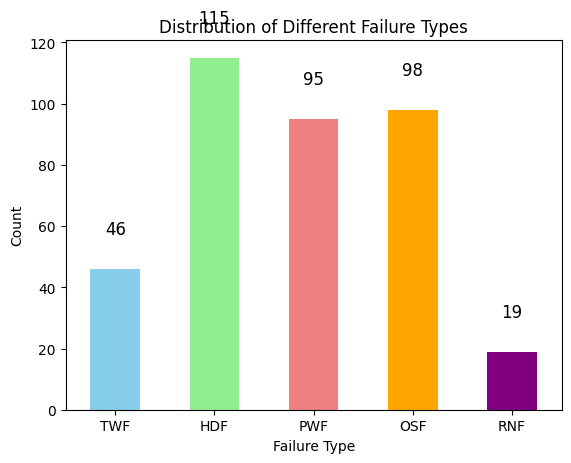

In [5]:
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()

ax = failure_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple'])

plt.title('Distribution of Different Failure Types')
plt.xlabel('Failure Type')
plt.ylabel('Count')

for i in range(len(failure_counts)):
    ax.text(i, failure_counts[i] + 10, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)
plt.show()

**ANALYSIS QUESTION:** What do you observe?

We have some features like RNF and TWF classes that hasn't a lot of examples 

**QUESTION:** Create a bar chart showing the distribution of failure types (TWF, HDF, PWF, OSF, RNF) among machines that experienced a failure (Machine failure == 1). Additionally, add a "No Specific Failure" category to count cases where a machine failed but no specific failure type was recorded. Display the exact values above each bar in the chart."

/var/folders/1t/5696w2xn2vsdwdq75jywx2sc0000gq/T/ipykernel_32619/856962246.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, failure_counts[i] + 2, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)


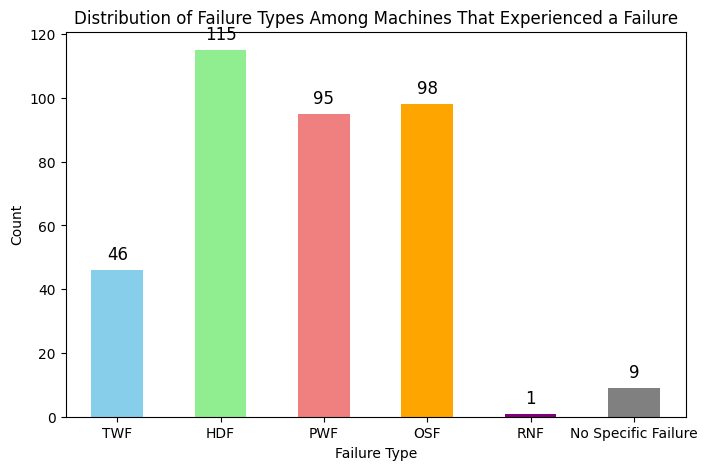

In [6]:
failed_machines = df[df['Machine failure'] == 1]

failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = failed_machines[failure_types].sum()

no_specific_failure = (failed_machines[failure_types] == 0).all(axis=1).sum()
failure_counts['No Specific Failure'] = no_specific_failure

plt.figure(figsize=(8, 5))
ax = failure_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'gray'])

plt.title('Distribution of Failure Types Among Machines That Experienced a Failure')
plt.xlabel('Failure Type')
plt.ylabel('Count')
for i in range(len(failure_counts)):
    ax.text(i, failure_counts[i] + 2, str(failure_counts[i]), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=0)
plt.show()

**ANALYSIS QUESTION:** What do you obsrve comapred to the previous question ? What can you conclude?

It is observed that only one RNF Failure has been detected and classified. Nine others have been detected but not classified. Finally, nine more have not been detected at all. We can conclude that RNF-type Failures are difficult to detect and that we will not be able to train the model to detect them due to insufficient data.

**QUESTION:** Display the names of the different columns in the dataset with their respective data types.

In [6]:
print(df.dtypes)

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object


**ANALYSIS QUESTION:** To train the model, what will be the inputs and outputs (What are the names of the columns that you will use?)? Justify your response.
Remember, you want to predict if the machine will fail, and if so, what kind of failure. You need to yse previous results to jsurtify your response.

### Inputs (X):

- **Air temperature [K]**: The air temperature is a relevant operating condition that could impact the machine's functioning
- **Process temperature [K]**: Similar to the air temperature, the process temperature could affect machine health.
- **Rotational speed [rpm]**: The rotational speed could indicate how hard the machine is working and if it is approaching failure.
- **Torque [Nm]**: Torque is another indicator of machine stress and can influence failure risk.
- **Tool wear [min]**: The amount of tool wear is critical in predicting failures, especially for tool wear failure (TWF), as wear increases with usage.

### Outputs (y):
The output labels should indicate whether a failure occurred and what type of failure it is. The following columns are the target variables for the model:

- **Machine failure**: This binary column (1 for failure, 0 for no failure) is essential to predict whether the machine will fail. It tells us if there was a failure or not.
- **TWF, HDF, PWF, OSF, RNF**: These columns represent the different types of failures:
  - **TWF**: Tool Wear Failure
  - **HDF**: Heat Dissipation Failure
  - **PWF**: Power Failure
  - **OSF**: Overstrain Failure
  - **RNF**: Random Failure

## **2- Train model Without balancing the dataset**

---



In this section, you must build and train a model without rebalancing the dataset.

**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [15]:
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

X = df.iloc[:, 3:8].values  
X[:, -1] = X[:, 2] * X[:, 3]  

failure_columns = ['TWF', 'HDF', 'PWF', 'OSF']
Y = df[failure_columns].values

no_failure = (Y.sum(axis=1) == 0).astype(int).reshape(-1, 1)
Y = np.hstack((Y, no_failure))

# Then we normalize data using z-score 

X = np.array(X, dtype=np.float64)

X = zscore(X, axis=0)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=42)


print(f"X_train size: {X_train.shape[0]}")
print(f"Y_train size: {Y_train.shape[0]}")
print(f"X_test size: {X_test.shape[0]}")
print(f"Y_test size: {Y_test.shape[0]}")



X_train size: 3000
Y_train size: 3000
X_test size: 7000
Y_test size: 7000


**QUESTION** Code below the model architecture

In [17]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**QUESTION** Code below the algorithms allowing to train model

**WARNING!** You need to plot the training and test accuracy and loss to check if our model is overfitting

Epoch 1/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0326 - accuracy: 0.9807 - val_loss: 0.0338 - val_accuracy: 0.9793
Epoch 2/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0337 - accuracy: 0.9797 - val_loss: 0.0337 - val_accuracy: 0.9793
Epoch 3/50
94/94 [==============================] - 1s 6ms/step - loss: 0.0328 - accuracy: 0.9810 - val_loss: 0.0342 - val_accuracy: 0.9790
Epoch 4/50
94/94 [==============================] - 1s 7ms/step - loss: 0.0329 - accuracy: 0.9817 - val_loss: 0.0336 - val_accuracy: 0.9801
Epoch 5/50
94/94 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9817 - val_loss: 0.0347 - val_accuracy: 0.9784
Epoch 6/50
94/94 [==============================] - 1s 6ms/step - loss: 0.0320 - accuracy: 0.9817 - val_loss: 0.0348 - val_accuracy: 0.9786
Epoch 7/50
94/94 [==============================] - 0s 5ms/step - loss: 0.0304 - accuracy: 0.9817 - val_loss: 0.0339 - val_accuracy: 0.9791
Epoch 8/50
94/94 [==

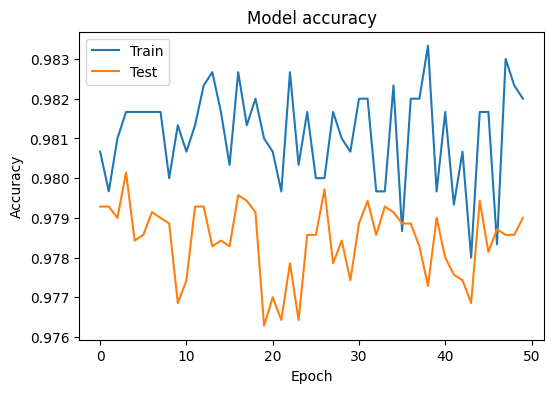

In [34]:
# Train the model
history = model.fit(X_train, np.array(Y_train), epochs=50, batch_size=32, validation_data=(X_test, np.array(Y_test)))

# Plot training & validation accuracy values
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("precisionV2.png")


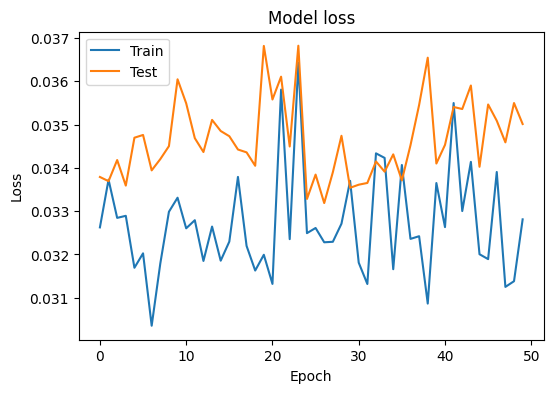

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig("lossV2.png")

plt.show()

**QUESTION** Plot the confusion matrix and the classification report

**Tips:**

*   classification report link

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

*   Matrix confusion

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html





219/219 [==============================] - 0s 1ms/step
Classification Report:
               precision    recall  f1-score   support

         TWF       0.00      0.00      0.00        30
         HDF       0.80      0.77      0.79        83
         PWF       0.63      0.70      0.66        63
         OSF       0.00      0.00      0.00        52
          NF       0.98      0.99      0.99      6772

    accuracy                           0.98      7000
   macro avg       0.48      0.49      0.49      7000
weighted avg       0.97      0.98      0.97      7000



/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


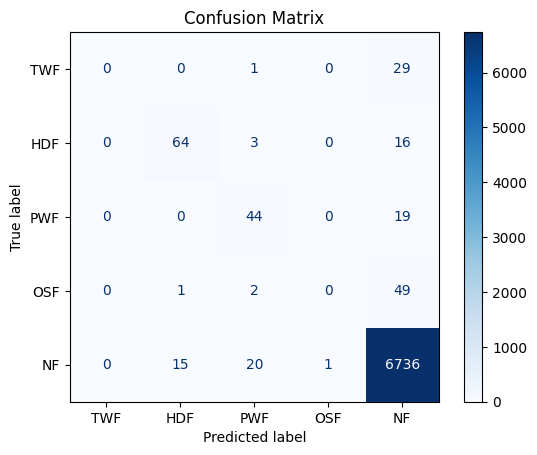

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=["TWF", "HDF", "PWF", "OSF", "NF"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TWF", "HDF", "PWF", "OSF", "NF"])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig("confusionV2.png")

**ANALYSIS QUESTION** What do you observe? What can you conclude?

We observe that the model achieves a satisfactory accuracy based on the confusion matrix. Indeed, there are very few off-diagonal values, and the most frequent case is NF (Non-Failure). However, we notice a significant number of prediction errors for the NF case.

## **3- Train model With balancing the dataset**

---

 Methods for rebalancing a dataset:


*   Use oversampling techniques (e.g., SMOTE) to generate synthetic data for minority classes


> https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html



*   Apply undersampling techniques (e.g., random undersampling, Tomek Links, Edited Nearest Neighbors) to reduce the majority class size



> https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html



*   Use class weighting during model training to penalize errors on minority classes



> https://www.tensorflow.org/tutorials/structured_data/imbalanced_data?hl=fr


**QUESTION:** Create X_train, Y_train, X_test, and Y_test. How many elements are present in X_train, Y_train, X_test, and Y_test? (Print the values)

In [36]:
from imblearn.over_sampling import SMOTE

X_filtered = []
Y_filtered = []

for x, y in zip(X, Y):
    if sum(y) == 1 or sum(y) == 0:  # Keep only single class or no failure
        X_filtered.append(x)
        Y_filtered.append(y)
        
X_filtered = np.array(X_filtered)
Y_filtered = np.array(Y_filtered)

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_filtered, Y_filtered)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.60, random_state=42)

print(f"X_train_resampled size: {len(X_resampled)}")
print(f"Y_train_resampled size: {len(Y_resampled)}")


X_train_resampled size: 48350
Y_train_resampled size: 48350


**ANALYSIS QUESTION:** Explain the choices you made to balance the dataset.

"Write your response here"

**QUESTION:** Code below the model architecture


**TIP:** It could be interesting to keep it the same as before

In [37]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(5, activation='softmax'))



model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


**QUESTION** Code below the algorithms allowing to train model


Epoch 1/50
605/605 [==============================] - 3s 3ms/step - loss: 0.2121 - accuracy: 0.7322 - val_loss: 0.1563 - val_accuracy: 0.7763
Epoch 2/50
605/605 [==============================] - 2s 4ms/step - loss: 0.1744 - accuracy: 0.7616 - val_loss: 0.1478 - val_accuracy: 0.7883
Epoch 3/50
605/605 [==============================] - 2s 3ms/step - loss: 0.1694 - accuracy: 0.7668 - val_loss: 0.1481 - val_accuracy: 0.8000
Epoch 4/50
605/605 [==============================] - 2s 3ms/step - loss: 0.1662 - accuracy: 0.7763 - val_loss: 0.1428 - val_accuracy: 0.8144
Epoch 5/50
605/605 [==============================] - 2s 3ms/step - loss: 0.1635 - accuracy: 0.7838 - val_loss: 0.1406 - val_accuracy: 0.8191
Epoch 6/50
605/605 [==============================] - 2s 4ms/step - loss: 0.1601 - accuracy: 0.7897 - val_loss: 0.1397 - val_accuracy: 0.8192
Epoch 7/50
605/605 [==============================] - 2s 4ms/step - loss: 0.1576 - accuracy: 0.7940 - val_loss: 0.1372 - val_accuracy: 0.8264
Epoch 

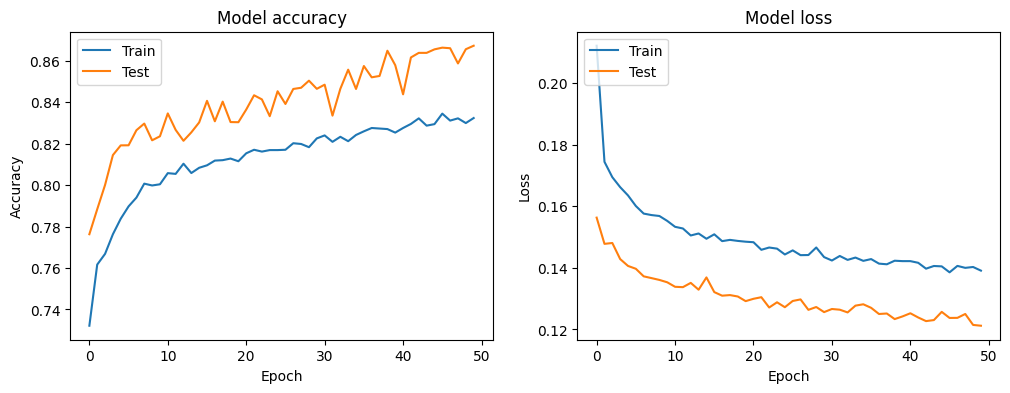

In [46]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_true_classes), y=y_true_classes)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

history = model.fit(X_train, np.array(Y_train), epochs=50, batch_size=32, validation_data=(X_test, np.array(Y_test)), class_weight=class_weights_dict)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

**QUESTION** Plot the confusion matrix and the classification report

907/907 [==============================] - 1s 1ms/step
Classification Report:
               precision    recall  f1-score   support

         TWF       0.69      0.91      0.78      5766
         HDF       0.99      1.00      0.99      5721
         PWF       0.99      0.99      0.99      5874
         OSF       0.89      0.96      0.93      5839
          NF       0.80      0.47      0.59      5810

    accuracy                           0.87     29010
   macro avg       0.87      0.87      0.86     29010
weighted avg       0.87      0.87      0.86     29010



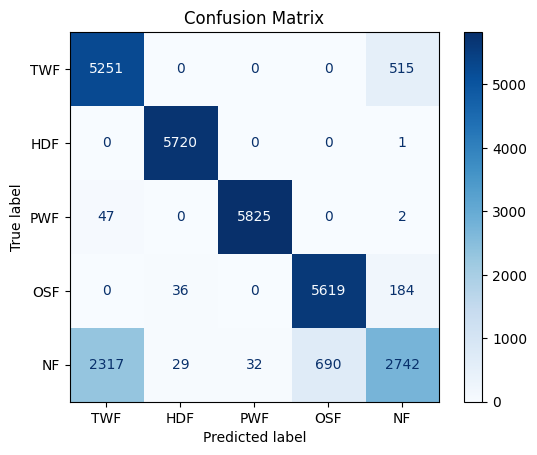

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

report = classification_report(y_true_classes, y_pred_classes, target_names=["TWF", "HDF", "PWF", "OSF", "NF"])
print("Classification Report:\n", report)

cm = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["TWF", "HDF", "PWF", "OSF", "NF"])

disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig("confusionV2.png")

**ANALYSIS QUESTION** What do you observe? What can you conclude?

In [49]:
model.save("modele_prediction_panneV2.h5")
np.save("x_test.npy", X_test)
np.save("y_test.npy", Y_test)

/usr/local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


"Write your response here"